In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  string
import nltk
import re
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Twitter Sentiments.csv')

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Preprocessing the dataset

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [7]:
# removing twitter handles

df['clear'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [8]:
df.head()

,id,label,tweet,clear
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# Removing special characters, numbers and punctuations

df['clear'] = df['clear'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clear
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
df['clear']= df['clear'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clear
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
# tokenize

tokenize_tweet = df['clear'].apply(lambda x: x.split())
tokenize_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clear, dtype: object

In [14]:
# stem the words

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

tokenize_tweet = tokenize_tweet.apply(lambda sentence: [ps.stem(word) for word in sentence])
tokenize_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clear, dtype: object

In [15]:
# Combine words into sentence

for i in range(len(tokenize_tweet)):
    tokenize_tweet[i] = " ".join(tokenize_tweet[i])
    
df['clear'] = tokenize_tweet
df.head()

,id,label,tweet,clear
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# EDA

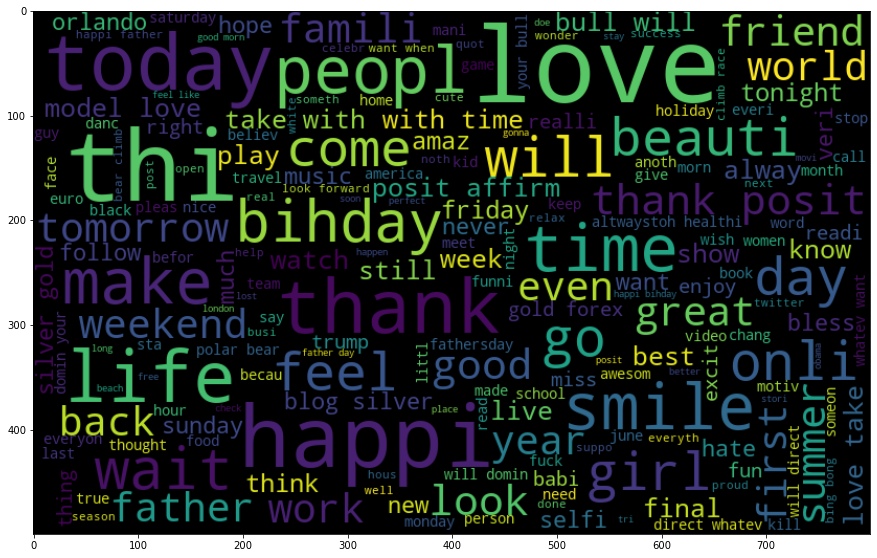

In [17]:
# Frequnt words

all_words = " ".join([sentence for sentence in df['clear']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis()
plt.show()

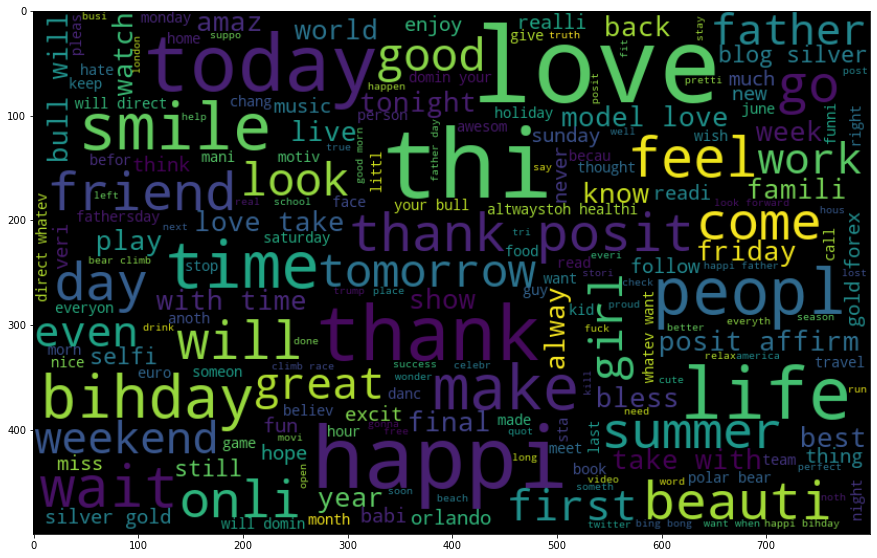

In [18]:
# Frequent positive words

all_words = " ".join([sentence for sentence in df['clear'][df['label'] == 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis()
plt.show()

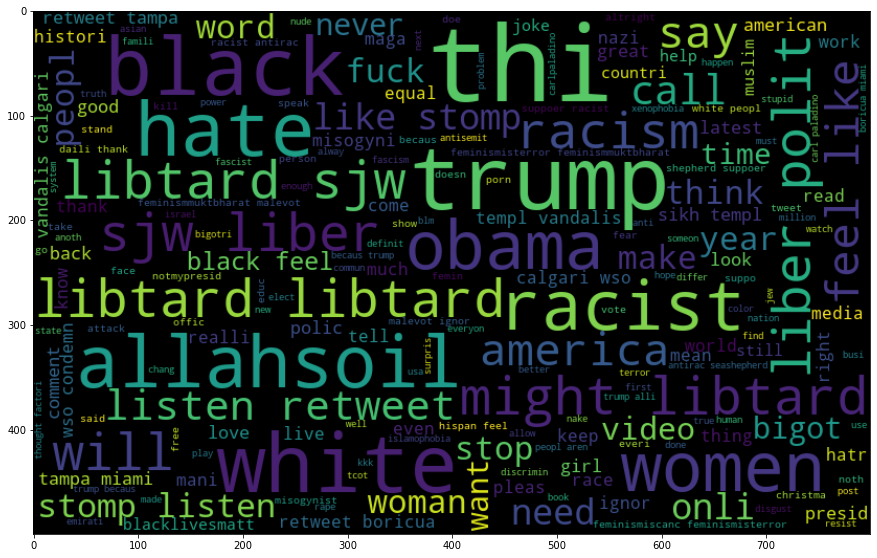

In [19]:
# Frequent negative words

all_words = " ".join([sentence for sentence in df['clear'][df['label'] == 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis()
plt.show()

In [20]:
# Extracting te hashtag

def hashtag_extract(tweet):
    hashtag = []
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtag.append(ht)
        
    return hashtag

In [21]:
# Extract #tag from tweets

ht_positive = hashtag_extract(df['clear'][df['label'] == 0])

ht_negative = hashtag_extract(df['clear'][df['label'] == 1])


In [24]:
ht_positive[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 []]

In [25]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [26]:
ht_positive[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [27]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


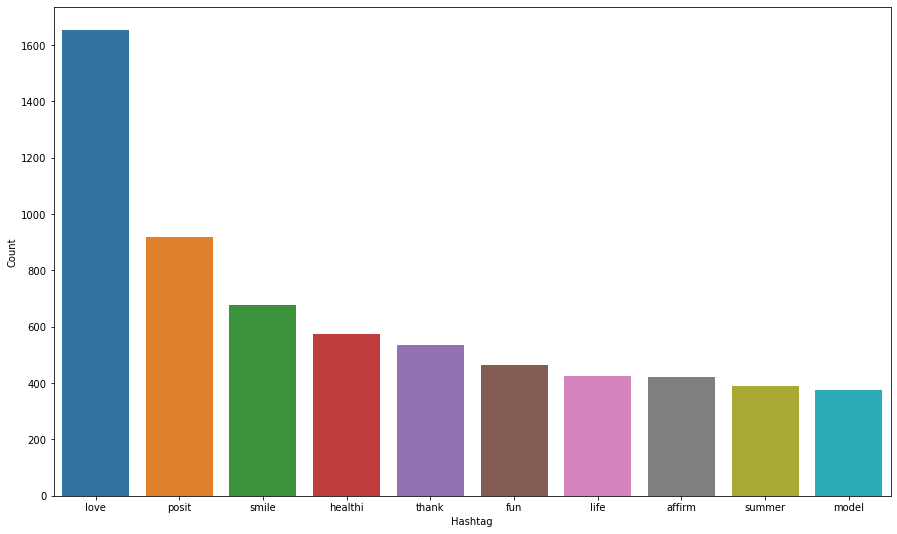

In [30]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [32]:
# feature extraction

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clear'])

In [33]:
bow[1]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [38]:
accuracy_score(y_test,pred)

0.9469403078463271

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
pred = rfc.predict(x_test)
f1_score(y_test, pred)

0.5684995340167754

In [41]:
accuracy_score(y_test,pred)

0.9420598172944563

# Support Vector Machine Classifier

In [43]:
from sklearn.svm import SVC
sv = SVC(kernel='linear', random_state=0) 
sv.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [44]:
pred = sv.predict(x_test)

In [45]:
accuracy_score(y_test, pred)

0.9473157301964711